# Part II - (Visualization Analysis of GoFord Bike system)
## by (Kehinde Salami)

## Investigation Overview

> In this investigation, I take a look at how the duration of trips changes with respect to DateTime and customer type. The main focus were on hours of the day, days of the week and customer type.


## Dataset Overview

> Ford GoBike is a bicycle sharing system that operates within the San Francisco Bay Area in California. Similar to other bike share programs, it employs a collection of sturdy bicycles that are secured into docking stations dispersed throughout the city. 

> The bicycles are particularly suited for one-way trips since they can be unlocked from one station and returned to any other station within the network. They are available for use all year round, 24 hours a day, and seven days a week, with membership or pass holders being able to access all bicycles in the network. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# read the data set - Ford GoBike cleaned Data
df = pd.read_csv('fordgobike_explanatory_dataset.csv', sep = ',')
df.head(3)

,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,duration_min,start_hr,start_day,start_month,end_hr,end_day,end_month,age
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,Male,No,869,17,Thursday,February,8,Friday,March,35
1,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,Male,No,1030,12,Thursday,February,5,Friday,March,47
2,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,Other,No,608,17,Thursday,February,4,Friday,March,30


## (Visualization 1)


### Key Insight 1: Trip duration among the user types

> - Customers travel longer distance regardless the day of the week.
> - Subscribers travel short distances but with little increase during the week ends.

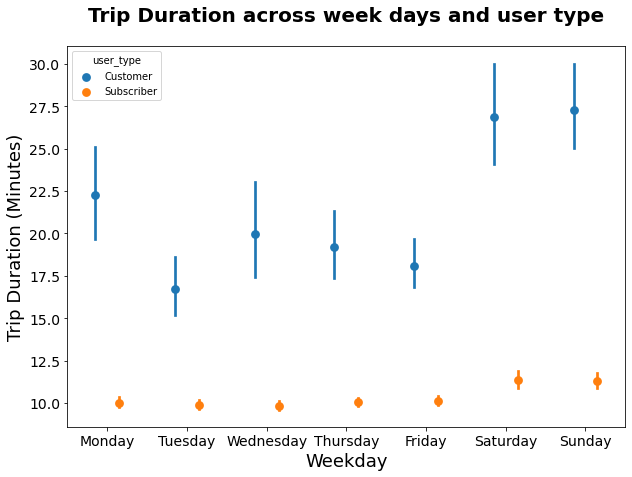

In [3]:
plt.figure(figsize = [10,7])
week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax = sns.pointplot(data = df, x ='start_day', y = 'duration_min', hue = 'user_type',
           linestyles = '', dodge = 0.3, order= week_order)

plt.title('Trip Duration across week days and user type', y=1.05, fontsize=20, fontweight='bold')
plt.ylabel('Trip Duration (Minutes)', size= 18)
plt.xlabel('Weekday', size= 18)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show();

## (Visualization 2)

### Key Insight 2: Gender and User type influence on the Bike System Rentage focusing on Weekly Trips.  

> - Male gender have highest number of bike usage weekly in both types of users.
> - Peak demand for bike rides is on Thursdays

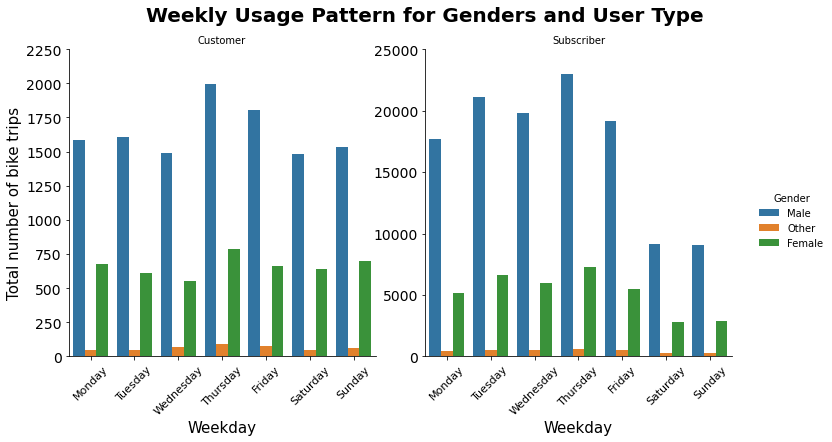

In [4]:
# using seaborn for the visualization
#plt.figure(figsize = [14,12])
ax = sns.catplot(data=df, x='start_day', col='user_type', hue='member_gender', 
                 order = week_order, sharey=False, kind='count')

ax.set_axis_labels('Weekday','Total number of bike trips', size= 15)
ax.set_titles("{col_name}")
ax._legend.set_title('Gender')
plt.suptitle('Weekly Usage Pattern for Genders and User Type', y=1.05, fontsize=20, fontweight='bold')
ax.set_xticklabels(size=11, rotation = 45)
ax.set_yticklabels(size=14)
plt.show();

## (Visualization 3)

### Key Insight 3: Hourly usage patterns in the weekdays by both user types

> - Bike rides occur mostly in the morning and evening.
> - The heatmap gives a precise look at the trend for bike usage behaviour across both user categories.

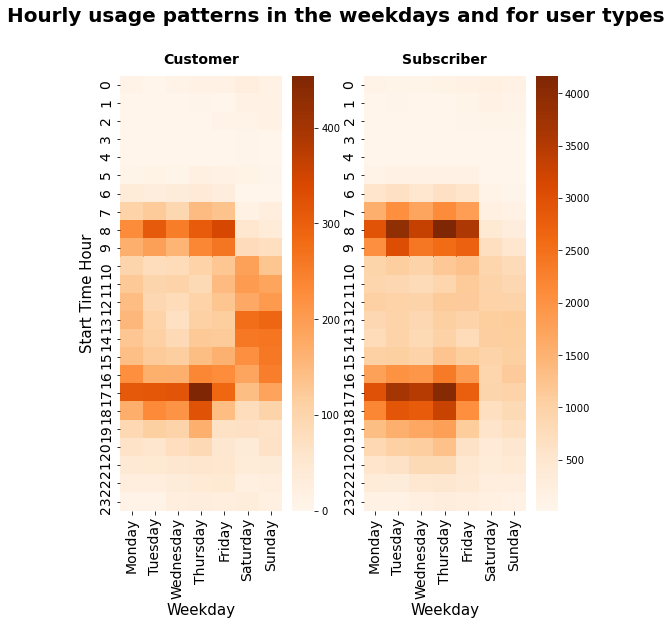

In [14]:
#  ordering the elements in the week days
df['start_day'] = pd.Categorical(df.start_day, categories = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday'], ordered = True)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
user_1 = df.query('user_type == "Customer"').groupby(["start_hr", "start_day"])["bike_id"].size().reset_index()
user_1 = user_1.pivot('start_hr','start_day','bike_id')
#plot heatmap for user 1 - customer
ax=sns.heatmap(user_1, cmap= 'Oranges')
plt.title("Customer", y=1.015, fontsize=14, fontweight='bold')
plt.xlabel('Weekday', size = 15)
plt.ylabel('Start Time Hour', size = 15)
plt.xticks(size=14)
plt.yticks(size=14)
plt.subplot(1,2,2)
user_2 = df.query('user_type == "Subscriber"').groupby(["start_hr", "start_day"])["bike_id"].size().reset_index()
user_2  = user_2.pivot('start_hr','start_day','bike_id')
#plot heatmap for user 2 - Subscribers
ax= sns.heatmap(user_2, cmap= 'Oranges')
plt.title("Subscriber", y=1.015, fontsize=14, fontweight='bold')
plt.xlabel('Weekday', size = 15)
plt.ylabel('')
plt.xticks(size=14)
plt.yticks(size=14)
plt.suptitle('Hourly usage patterns in the weekdays and for user types', y=1.00, fontsize=20, fontweight='bold');
plt.show()


## (Visualization 4)

### Key Insight 4: Weekday popular amongst the bike user types

> - Thursday remains the day with the most bike usage by both user types.
> - From the customer's plot, it appears that there are more bike trips on the weekends than for subscribers.

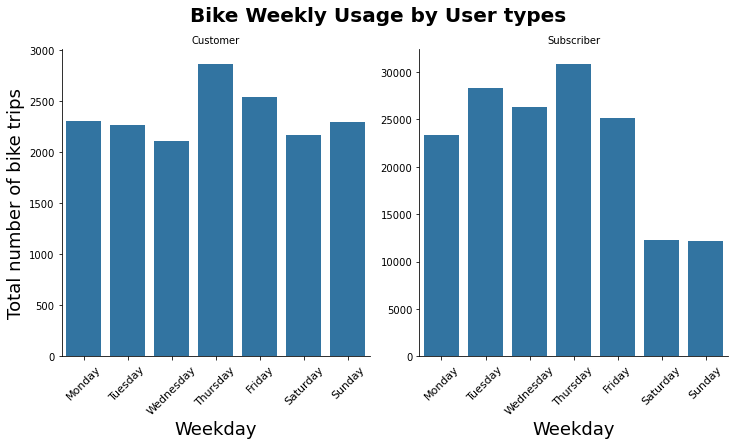

In [6]:
base_color = sns.color_palette()[0]

week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

ax = sns.catplot(data=df, x='start_day', col='user_type',color = base_color,  order= week_order,
                            sharey= False, kind='count')

ax.set_axis_labels('Weekday','Total number of bike trips', size= 18)
ax.set_titles("{col_name}")
ax.set_xticklabels(size=11, rotation = 45);
plt.suptitle('Bike Weekly Usage by User types', y=1.05, fontsize=20, fontweight='bold');

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [16]:
!jupyter nbconvert --to slides --no-input --no-prompt "Part_II_slide_deck_explanatory_data_analysis.ipynb"

[NbConvertApp] Converting notebook Part_II_slide_deck_explanatory_data_analysis.ipynb to slides
[NbConvertApp] Writing 732944 bytes to Part_II_slide_deck_explanatory_data_analysis.slides.html


> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 